In [ ]:
from __future__ import absolute_import, division, print_function
import glob
import os
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import sys
import matplotlib.pyplot as plt
import json
from sklearn.decomposition import PCA

from pathlib import Path
import dotenv
dotenv.load_dotenv()
p_code = Path(os.environ.get("HOME_DIR"))
p_data = Path(os.environ.get("DATA_DIR"))

net = 'stepnet'
PATH_YANGNET = os.path.join(p_code,net) 

sys.path.insert(0, PATH_YANGNET)
from tools_lnd import make_h_trial_rule, get_model_params, plot_epoch_dynamics_3D
from tools_lnd import gen_trials_from_model_dir, make_FP_axs, take_names, get_filename, make_D_use

In [ ]:
fig = 'fig1'
figpath = os.path.join(p_code,'figs',fig,'fig1_CDEF')
if not os.path.exists(figpath):
    os.makedirs(figpath)

In [3]:
# ##################################################################
# #Find right model dir
# ##################################################################

rule_trains = ['delaygo',]
file = 'LeakyRNN_softplus_diag_1_tasks_256_n_rnn_lr7.0l2_w6.0_h6.0_delaygo_0'
m = os.path.join(p_data,fig,file)

In [ ]:
fig = plt.figure(figsize=(10, 5))
fname = os.path.join(m, 'log.json')

with open(fname, 'r') as f:
    log_all = json.load(f)

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# Define a colormap
cmap = plt.cm.get_cmap('Greys')

# Plot cost and performance for each rule
for i, rule in enumerate(task_list):
    color = cmap(i+1 / (len(task_list) + 2))  # Normalize color index

    ax1.plot(np.log(log_all['cost_'+rule]), '-', color=color, alpha=0.5, label=rule)
    ax2.plot(log_all['perf_'+rule], '-', color=color, alpha=0.5, label=rule)

# Set axis labels and title
ax1.set_xlabel('Training Step (x 1000)')
ax1.set_ylabel('Log Cost [for each task]')
ax2.set_xlabel('Training Step (x 1000)')
ax2.set_ylabel('Performance [for each task]')
# fig.suptitle(file)  # Set a common title for both subplots


# Add legend
ax2.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [5]:
#output dynamics
rule = rule_trains[0]
h,trial,tasks = make_h_trial_rule(m)
w_in, b_in, w_out, b_out = get_model_params(m)

Overwrite sigma_rec with 0.000
Instructions for updating:
Use output_signature instead
Instructions for updating:
Use output_signature instead
Instructions for updating:
This is a deprecated API that should only be used in TF 1 graph mode and legacy TF 2 graph mode available through `tf.compat.v1`. In all other situations -- namely, eager mode and inside `tf.function` -- you can consume dataset elements using `for elem in dataset: ...` or by explicitly creating iterator via `iterator = iter(dataset)` and fetching its elements via `values = next(iterator)`. Furthermore, this API is not available in TF 2. During the transition from TF 1 to TF 2 you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)` to create a TF 1 graph mode style iterator for a dataset created through TF 2 APIs. Note that this should be a transient state of your code base as there are in general no guarantees about the interoperability of TF 1 and TF 2 code.
Instructions for updating:
Call initializer instance

/Users/lauradriscoll/miniconda3/envs/flex_mult/lib/python3.10/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1702: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '
2024-03-28 22:50:21.793566: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(276, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
Instructions for updating:
Use `tf.global_variables_initializer` instead.
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/flexible_multitask/fig1/LeakyRNN_softplus_diag_1_tasks_256_n_rnn_lr7.0l2_w6.0_h6.0_delaygo_0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/flexible_multitask/fig1/LeakyRNN_softplus_diag_1_tasks_256_n_rnn_lr7.0l2_w6.0_h6.0_delaygo_0/model.ckpt


Overwrite sigma_rec with 0.000
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/flexible_multitask/fig1/LeakyRNN_softplus_diag_1_tasks_256_n_rnn_lr7.0l2_w6.0_h6.0_delaygo_0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/flexible_multitask/fig1/LeakyRNN_softplus_diag_1_tasks_256_n_rnn_lr7.0l2_w6.0_h6.0_delaygo_0/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(276, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/flexible_multitask/fig1/LeakyRNN_softplus_diag_1_tasks_256_n_rnn_lr7.0l2_w6.0_h6.0_delaygo_0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/flexible_multitask/fig1/LeakyRNN_softplus_diag_1_tasks_256_n_rnn_lr7.0l

/Users/lauradriscoll/Documents/code/flexible_multitask/stepnet/tools_lnd.py:1723: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(h_D[0,0],h_D[0,1],h_D[0,2],
/Users/lauradriscoll/Documents/code/flexible_multitask/stepnet/tools_lnd.py:1730: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(h_D[-1,0],h_D[-1,1],h_D[-1,2],
/var/folders/_8/556chyfx1hvd7cyh7d14w3dh0000gn/T/ipykernel_10546/214210757.py:61: UserWarni

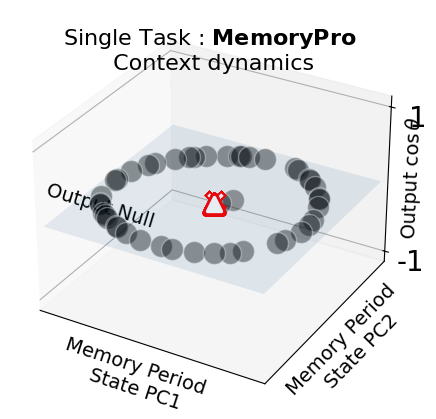

/Users/lauradriscoll/Documents/code/flexible_multitask/stepnet/tools_lnd.py:1723: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(h_D[0,0],h_D[0,1],h_D[0,2],
/Users/lauradriscoll/Documents/code/flexible_multitask/stepnet/tools_lnd.py:1730: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(h_D[-1,0],h_D[-1,1],h_D[-1,2],
/var/folders/_8/556chyfx1hvd7cyh7d14w3dh0000gn/T/ipykernel_10546/214210757.py:61: UserWarni

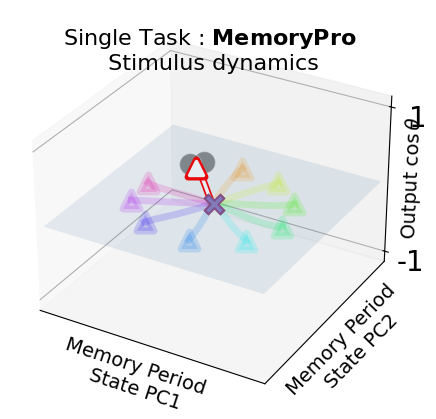

/Users/lauradriscoll/Documents/code/flexible_multitask/stepnet/tools_lnd.py:1723: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(h_D[0,0],h_D[0,1],h_D[0,2],
/Users/lauradriscoll/Documents/code/flexible_multitask/stepnet/tools_lnd.py:1730: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(h_D[-1,0],h_D[-1,1],h_D[-1,2],
/var/folders/_8/556chyfx1hvd7cyh7d14w3dh0000gn/T/ipykernel_10546/214210757.py:61: UserWarni

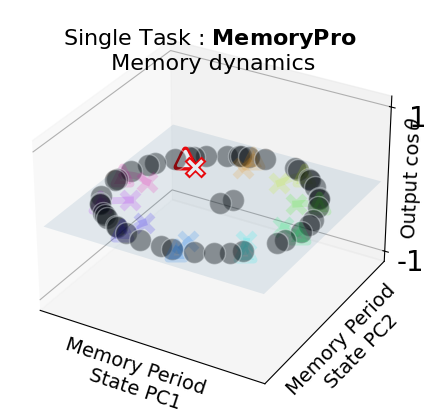

/Users/lauradriscoll/Documents/code/flexible_multitask/stepnet/tools_lnd.py:1723: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(h_D[0,0],h_D[0,1],h_D[0,2],
/Users/lauradriscoll/Documents/code/flexible_multitask/stepnet/tools_lnd.py:1730: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(h_D[-1,0],h_D[-1,1],h_D[-1,2],


In [ ]:
plt.rcParams.update({'font.size': 16})

lim = 1
lil_axes = False
plot_unstable = True
stim_theta = 0 #which fps to plot
rule = rule_trains[0]
fp_file = 'tf_fixed_pts_manytrials'

h,trial,tasks = make_h_trial_rule(m,mode = 'test')
# pca = PCA(n_components = 10)
# x = np.transpose(h[rule],(2,1,0))
# _ = pca.fit_transform(np.reshape(x,(x.shape[0],-1)).T)
# D_use = -pca.components_.T[:,1:]
D_use = make_D_use(m,rule,'delay1',0,'pca_h')
D_use[:,0] = -D_use[:,0]
D_use[:,1] = -D_use[:,1]
D_use[:,2] = w_out[:,2]

for epoch in trial[rule].epochs.keys():
    ax = plot_epoch_dynamics_3D(m,fp_file,epoch,h,trial,rule,D_use,y_set = [stim_theta,],lim = lim,
                                plot_eigenspect = False,lil_axes = lil_axes,fig_scale = 4,plot_title = True,
                                plot_unstable = plot_unstable,ax_labels = ['PC1','PC2','Output '+'$\cos{\theta}$'],
                                q_thresh = -6,fp_size = 250)
    
    ax.set_xlim([-.9,.9])
    ax.set_ylim([-.9,.9])
    [x1,x2] = ax.get_xlim()
    [y1,y2] = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(x1, x2, num=2), np.linspace(y1, y2, num=2))
    z = xx*0
    ax.plot_surface(xx, yy, z, alpha=0.1)
    
    
    ax.set_zlim([-1.1,1.1])
    ax.set_zticks([-1,1])
    ax.set_zticklabels([-1,1],fontsize = 20)
    
    ax.set_xticks([])
    ax.set_yticks([])
    plt.axis('on')
    ax.grid(True)
    
    ax.set_zlabel('Output '+r'$\cos{\theta}$',labelpad=-10,fontsize = 14)
    if epoch == 'fix1':
        ax.text(x1, y1, 0, 'Output Null', (1,0,0),fontsize = 14)
        
    ax.set_xlabel('Memory Period \n State PC1', labelpad=-5,fontsize = 14)
    ax.set_ylabel('Memory Period \n State PC2', labelpad=-5,fontsize = 14)
    
    ax.dist = 11
    
    
    if lil_axes ==True:
        figname = rule + '_' + epoch +'lil_axes.pdf'
    else:
        figname = rule + '_' + epoch +'.pdf'
        
    if not os.path.exists(figpath):
        os.makedirs(figpath)
    plt.savefig(os.path.join(figpath,figname))

    plt.show()

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(276, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final/all/LeakyRNN/softplus/diag/1_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final/all/LeakyRNN/softplus/diag/1_tasks/256_n_rnn/lr7.0l2_w6.0_h6.0_delaygo/0/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(276, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restorin

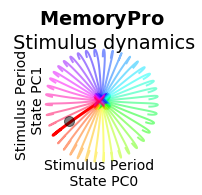

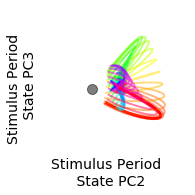

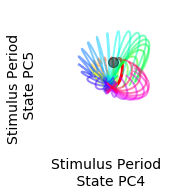

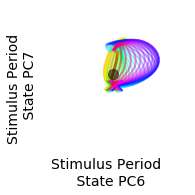

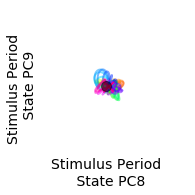

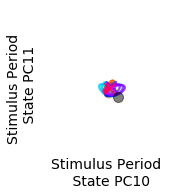

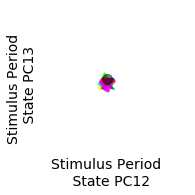

In [7]:
from tools_lnd import plot_epoch_dynamics

epoch = 'stim1'
fp_file = 'tf_fixed_pts_manytrials'
trial = gen_trials_from_model_dir(m,rule,noise_on = False)
filename,_ = get_filename(trial,epoch,0)
f = os.path.join(m,fp_file,rule,filename+'.npz')
D_use = make_FP_axs(f, m, rule, epoch, axs = 'pca_h', clust = 'False',n_components = 20)

plt.rcParams.update({'font.size': 16})

lim = 1
lil_axes = False
plot_unstable = True
stim_theta = 0 #which fps to plot

h,trial,tasks = make_h_trial_rule(m,mode = 'test')

print_title = True
for pcs in range(7):
    ax = plot_epoch_dynamics(m,fp_file,epoch,h,trial,rule,D_use[:,[2*pcs,2*pcs+1]],
                            y_set = [0,],h_epoch = [],plot_eigenspect = False,lim=4, ax_type = 'none',
                            epoch_axes =[],stim_loc_fp = 0,fig_scale = 3, print_title = print_title)
    print_title = False

    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])

    ax.set_xticks([])
    ax.set_yticks([])
#     plt.axis('off')

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    plt.xlabel('Stimulus Period \n State PC'+str(2*pcs), labelpad=-5,fontsize = 14)
    plt.ylabel('Stimulus Period \n State PC'+str(2*pcs+1), labelpad=-5,fontsize = 14)
    
    figname = rule + '_' + epoch +'PCS'+str(pcs)+'.pdf'
        
    if not os.path.exists(figpath):
        os.makedirs(figpath)
    plt.savefig(os.path.join(figpath,figname))

    plt.show()